# Ancho de Banda

Comunicación de Datos -  Ing. Computación

Universidad Nacional de San Luis 2024



**Objetivos:**

Estime numéricamente qué porcentaje de la energía de una señal de pulsos está contenida en el primer, segundo y tercer lóbulo de su espectro.

Estime también que ancho de banda se requiere para obtener el 99% y 90% de la energía de la señal, y

a que ancho de banda se obtiene el punto de -3dB respecto de la máxima amplitud de la señal.


(819+0j)


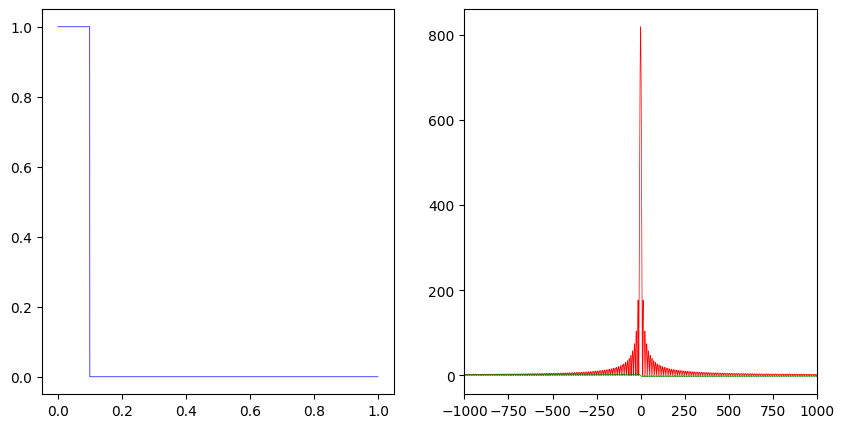

In [3]:

#--------------------------------------------------------------------
#         Recordar que la FFT es Fast Fourier Transform
#--------------------------------------------------------------------
# La FFT es un algoritmo que permite calcular la DFT de una secuencia de manera mucho más eficiente.
# La DFT directa tiene una complejidad computacional de O(N2)O(N2), lo que puede ser muy lento para
# secuencias largas. La FFT reduce esta complejidad a O(Nlog⁡N)O(NlogN), haciendo posible el análisis de señales
# largas en un tiempo razonable. La FFT explota las simetrías y periodicidades en los coeficientes de Fourier para
# reducir el número de cálculos necesarios. El algoritmo más comúnmente usado para la FFT es el algoritmo de Cooley-Tukey,
# que divide recursivamente una DFT de tamaño NN en dos DFT de tamaño N/2N/2, y así sucesivamente.
# Este enfoque de "divide y vencerás" permite una drástica reducción en el número de operaciones aritméticas
#--------------------------------------------------------------------


import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
from mpl_toolkits.mplot3d import Axes3D



# Parámetros de simulación
Fs = 8192       #frecuencia de muestreo
tmax=8192/Fs    #tiempo máximo de la simulación, calculado como la duración total de la señal en segundos

retardo=0.0
duracion=.1

# Instantes de muestreo de la señal
t = np.arange(0, tmax, step=1. / Fs)  #vector que contiene los instantes de muestreo de la señal, desde 0 hasta tmax con un paso de 1/Fs (periodo)

# Generación de la señal
pu=t-t    #inicializa el vector pu con ceros
pu[round(retardo*Fs):round((retardo+duracion)*Fs)]=1
#modifica el vector pu asignando el valor 1 a un rango específico de elementos.
#El rango se define utilizando la notación de corte de rebanadas extendida en Python.
#  round(retardo*Fs): Calcula el índice entero correspondiente al inicio del rango.
#                     se multiplica el retardo por la frecuencia de muestreo (Fs) y se redondea al entero más cercano.
#  round((retardo+duracion)*Fs): Calcula el índice entero correspondiente al final del rango.
#                                Se multiplica la suma de retardo y duracion por la frecuencia de muestreo (Fs) y
#                                se redondea al entero más cercano.
#  Resumen: El código crea un vector de pulso rectangular con un ancho de duracion segundos y un retardo de
#           retardo segundos. El vector tiene el valor 1 dentro del rango de tiempo especificado por el
#           retardo y la duración, y el valor 0 en el resto del vector.
#  Importante: Una mayor frecuencia de muestreo, da como resultado una representacion mas precisa del pulso.



# Grafico de la señal en el dominio del tiempo
fig = plt.figure(figsize=[10,5])
ax_t = fig.add_subplot(121)
ax_t.plot(t, pu, c='b',linewidth=0.5)


# Calcular la FFT de la señal
fft_result = np.fft.fft(pu)    #aplica la Transformada Rápida de Fourier (FFT) al vector pu utilizando la función np.fft.fft del módulo fft de NumPy.
fft_shifted = np.fft.fftshift(fft_result)  # Desplazar la FFT para que la frecuencia 0 esté en el centro

# Crear vector de frecuencias desplazadas
frequencies = np.fft.fftfreq(len(pu), 1/Fs)
frequencies_shifted = np.fft.fftshift(frequencies)
print(max(fft_shifted))

# Graficar la FFT
ax_f= fig.add_subplot(122)
ax_f.axes.set_xlim(left=-1000, right=1000)
ax_f.plot(frequencies_shifted, np.abs(fft_shifted), 'r',linewidth=0.5)
ax_f.plot(frequencies_shifted, np.angle(fft_shifted),'g', linewidth=0.5)




In [4]:
# integra el valor cuadrado de la matriz fft_shifted
# de esta forma se calcula la energia de una señal
# utilizando la fft

import numpy as np

# Calcular el cuadrado de los valores de FFT.
fft_squared = np.square(np.abs(fft_shifted))

# Integrar los valores cuadrados
energy = np.trapz(fft_squared, frequencies_shifted)

print("Energia total de la señal:", energy)


Energia total de la señal: 6709247.047723146


In [5]:
# calcular la energía de fft_shifted hasta frecuencia_shifted = 1/duracion
# esto para poder calcular la energia del primer lobulo, desde -1/periodo hasta 1/periodo

#-------------------------------------
#      Integracion Trapezoidal
#-------------------------------------
#  es un método numérico para aproximar el valor de una integral definida. Es uno de los métodos de cuadratura
#  más simples y se basa en la idea de aproximar el área bajo una curva mediante una serie de trapecios y
#  sumarlos. Dada una función f(x) que queremos integrar en el intervalo [a,b], la regla del trapecio
#  divide este intervalo en n subintervalos de igual longitud y aproxima el área bajo la curva f(x) como la suma de las áreas de trapecios.



import numpy as np
# Calcula la energía de fft_shifted hasta frecuencia_shifted = 1/duracion
energy_up_to_1_over_duration = np.trapz(fft_squared[np.abs(frequencies_shifted) < 1/duracion], frequencies_shifted[np.abs(frequencies_shifted) < 1/duracion])
# np.abs(frequencies_shifted) < 1/duracion crea una máscara booleana donde True indica elementos en
# frequencies_shifted con valores absolutos menores a 1/duracion. Esto selecciona frecuencias dentro de un rango específico
# fft_squared[np.abs(frequencies_shifted) < 1/duracion] usa esta máscara para filtrar el arreglo fft_squared, conservando
# solo las magnitudes cuadradas correspondientes al rango de frecuencia seleccionado.
# np.trapz integra los valores filtrados de fft_squared con respecto a los frequencies_shifted filtrados correspondientes
# utilizando la integración trapezoidal numérica. Esto calcula la energía dentro del rango de frecuencia seleccionado


print("Energia en el primer lobulo:", energy_up_to_1_over_duration)

# Calcula el porcentaje de energía en el primer lóbulo.
percentage_energy_first_lobe = energy_up_to_1_over_duration / energy * 100

print("Porcentaje de energia del primer lobulo:", percentage_energy_first_lobe, "%")


Energia en el primer lobulo: 6049235.79111194
Porcentaje de energia del primer lobulo: 90.1626627859055 %


In [6]:
# Calcula el porcentaje de energia de los otros lobulos


import numpy as np
# Calcula la energia de fft_shifted con frequency_shifted = 2/duracion
# Considera frecuencias dentro del rango absoluto menor a 2/duracion.
# Esto selecciona efectivamente los dos primeros lóbulos del espectro
energy_up_to_2_over_duration = np.trapz(fft_squared[np.abs(frequencies_shifted) < 2/duracion], frequencies_shifted[np.abs(frequencies_shifted) < 2/duracion])
print("Energia de los dos primeros lobulos:", energy_up_to_2_over_duration)


# Calcula el porcentaje de energia de los dos primeros lobulos
percentage_energy_first_two_lobes = energy_up_to_2_over_duration / energy * 100
print("Porcentaje de energia de los dos primeros lobulos:", percentage_energy_first_two_lobes, "%")



# Calcula la energia de fft_shifted con frequency_shifted = 3/duracion
# Considera frecuencias dentro del rango absoluto menor a 2/duracion.
# Esto selecciona efectivamente los dos primeros lóbulos del espectro
energy_up_to_3_over_duration = np.trapz(fft_squared[np.abs(frequencies_shifted) < 3/duracion], frequencies_shifted[np.abs(frequencies_shifted) < 3/duracion])
print("Porcentaje de energia de los tres primeros lobulos:", energy_up_to_3_over_duration)



# Calcula el porcentaje de energia en los primeros tres lobulos respecto del total
percentage_energy_first_three_lobes = energy_up_to_3_over_duration / energy * 100
print("Porcentaje de energia en los primeros 3 lobulos:", percentage_energy_first_three_lobes, "%")


Energia de los dos primeros lobulos: 6371570.518299309
Porcentaje de energia de los dos primeros lobulos: 94.96699812926948 %
Porcentaje de energia de los tres primeros lobulos: 6483113.557756283
Porcentaje de energia en los primeros 3 lobulos: 96.62952506654821 %


In [5]:
print("Porcentaje de energia en el primer lobulo:", percentage_energy_first_lobe, "%")
print("Porcentaje de energia en el segundo lobulo:", percentage_energy_first_two_lobes-percentage_energy_first_lobe, "%")
print("Porcentaje de energia en el tercer lobulo:", percentage_energy_first_three_lobes-percentage_energy_first_two_lobes, "%")

Porcentaje de energia en el primer lobulo: 90.1632209522797 %
Porcentaje de energia en el segundo lobulo: 4.803954827586168 %
Porcentaje de energia en el tercer lobulo: 1.662377207413769 %


## Estime también que ancho de banda se requiere para obtener el 99% y 90% de la energía de la señal

In [7]:
# calcular las frecuencias (frequencies_shifted) hasta las cuales la energía de fft_shifted es 90 y 99%

import numpy as np
# Calcula la suma acumulada de la energía en fft_squared
cumulative_energy = np.cumsum(fft_squared)
# Esto se refiere a la función NumPy cumsum que realiza una suma acumulativa. Toma una matriz como entrada
# y devuelve una nueva matriz donde cada elemento representa la suma de sí mismo y de todos los elementos
# anteriores de la matriz original.


# Encuentra las frecuencias donde la energía acumulada alcanza el 90% y el 99% de la energía total
frequencies_90_percent = frequencies_shifted[np.argwhere(cumulative_energy >= 0.9 * energy)[0][0]]
frequencies_99_percent = frequencies_shifted[np.argwhere(cumulative_energy >= 0.99 * energy)[0][0]]

# Print the results
print("Frecuencias hasta las cuales la energía de fft_shifted es del 90%:", frequencies_90_percent)
print("Frecuencias hasta las cuales la energía de fft_shifted es del 99%:", frequencies_99_percent)


Frecuencias hasta las cuales la energía de fft_shifted es del 90%: 5.0
Frecuencias hasta las cuales la energía de fft_shifted es del 99%: 52.0


In [8]:
# calcula y muestra el porcentaje de energía acumulada de la Transformada Rápida de Fourier (FFT) de una
# señal hasta diferentes frecuencias límite, que van desde 10 Hz hasta 500 Hz en incrementos de 10 Hz

import numpy as np


# Define el limite superior de frecuencia
upper_limit = 500

# Inicializar lista de porcentajes
percentages = []

# Bucle a traves de frecuencias de 10Hz a 500Hz, saltando de a 10Hz
for frequency in range(10, upper_limit + 1, 10):
  # Calculo de la energia acumulada hasta la frecuencia actual
  energy_up_to_frequency = np.trapz(fft_squared[np.abs(frequencies_shifted) < frequency], frequencies_shifted[np.abs(frequencies_shifted) < frequency])

  # Calcula el porcentaje de energia acumulada hasta la frecuencia actual
  percentage_energy = energy_up_to_frequency / energy * 100

  # cargar el porcentaje a la lista
  percentages.append(percentage_energy)

  # mostrar
  print(f"Porcentaje de energia hasta {frequency} Hz: {percentage_energy:.2f}%")


Porcentaje de energia hasta 10 Hz: 90.16%
Porcentaje de energia hasta 20 Hz: 94.97%
Porcentaje de energia hasta 30 Hz: 96.63%
Porcentaje de energia hasta 40 Hz: 97.47%
Porcentaje de energia hasta 50 Hz: 97.97%
Porcentaje de energia hasta 60 Hz: 98.31%
Porcentaje de energia hasta 70 Hz: 98.55%
Porcentaje de energia hasta 80 Hz: 98.73%
Porcentaje de energia hasta 90 Hz: 98.87%
Porcentaje de energia hasta 100 Hz: 98.99%
Porcentaje de energia hasta 110 Hz: 99.08%
Porcentaje de energia hasta 120 Hz: 99.16%
Porcentaje de energia hasta 130 Hz: 99.22%
Porcentaje de energia hasta 140 Hz: 99.28%
Porcentaje de energia hasta 150 Hz: 99.32%
Porcentaje de energia hasta 160 Hz: 99.37%
Porcentaje de energia hasta 170 Hz: 99.40%
Porcentaje de energia hasta 180 Hz: 99.44%
Porcentaje de energia hasta 190 Hz: 99.47%
Porcentaje de energia hasta 200 Hz: 99.49%
Porcentaje de energia hasta 210 Hz: 99.52%
Porcentaje de energia hasta 220 Hz: 99.54%
Porcentaje de energia hasta 230 Hz: 99.56%
Porcentaje de energi

## A que ancho de banda se obtiene el punto de -3dB respecto de la máxima amplitud de la señal?

In [9]:
#  encontrar la frecuencia a la que la potencia de la fft disminuye a -3dB
#  por debajo de la potencia máxima dentro del primer lóbulo de la transformada. El nivel de -3dB corresponde
#  a la mitad de la potencia máxima, ya que −3dB se calcula como 10log10​(0.5)

import numpy as np

# encuentra el valor máximo en fft_squared
max_power = np.max(fft_squared)

# encontrar la frecuencia donde la potencia cae a -3dB (la mitad de la potencia máxima)
frequency_3db = frequencies_shifted[np.argwhere(fft_squared <= max_power * 0.5)]
# np.argwhere(fft_squared <= max_power * 0.5) devuelve los índices donde fft_squared es menor o igual a la mitad de la potencia máxima

# mostrar
print("Frecuencia a -3dB:", np.min(np.abs(frequency_3db)))


Frequency at -3dB: 5.0
